# 加密货币中的常见风险因素

复刻框架

I. 数据准备与预处理

	1.	数据来源：
	•	使用 CoinMarketCap 或类似平台获取加密货币的日交易数据，包括开盘价、收盘价、最高价、最低价、交易量和市值。
	•	数据时间范围为 2014 年至 2020 年 7 月。
	2.	数据筛选：
	•	仅保留市值超过 100 万美元的加密货币。
	•	排除交易量为零或未提供完整交易数据的加密货币。
	•	处理退市币种的生存偏差问题（如假定退市收益为 -30%）。
	3.	计算收益：
	•	按周计算每种加密货币的收益率，将每日数据聚合为周数据。

II. 横截面特征构建

	1.	特征选择：
	•	基于股票市场因子文献，选择 24 个加密货币特征：
	•	规模：市值、价格、最高价、币龄。
	•	动量：过去 1 周、2 周、3 周、4 周、1 至 4 周的收益。
	•	交易量：平均交易量、价格乘交易量、标准化交易量。
	•	波动率：收益标准差、价格波动率、最大收益、延迟收益等。
	2.	特征构建：
	•	将每日或周数据转化为标准化的特征（如对数市值、对数交易量）。
	•	将特征按周排序，分为五个分组（分位数分组）。

III. 长短策略收益分析

	1.	组合构建：
	•	按每个特征将加密货币分为五组（从最低到最高）。
	•	构建长-短组合：做多最低组，做空最高组。
	2.	组合收益计算：
	•	计算每周组合的超额收益（相对于无风险利率）。
	3.	统计分析：
	•	计算组合的平均收益及其显著性。
	•	检验各特征与组合收益之间的单调性。

IV. 因子模型构建与验证

	1.	因子模型：
	•	市场因子（CMKT）：加密货币市场的超额收益。
	•	规模因子（CSMB）：小市值组合与大市值组合的收益差。
	•	动量因子（CMOM）：高动量组合与低动量组合的收益差。
	2.	因子提取：
	•	对每周数据，基于市值和动量特征构建因子。
	•	使用三因子模型对 10 个长短策略的超额收益进行回归。
	3.	验证因子解释能力：
	•	检验因子模型能否解释长短策略收益（α 是否显著）。
	•	对比一因子模型（仅市场因子）、两因子模型与三因子模型的拟合效果。

V. 主成分分析（PCA）

	1.	目标：
	•	确定少量主成分是否可以解释 24 个特征的收益变化。
	2.	过程：
	•	对长短策略收益进行主成分分析。
	•	分析主要成分与市场、规模、动量因子的相关性。

VI. 机制探讨与额外分析

	1.	规模效应的流动性机制：
	•	测试小市值货币是否存在更高的流动性溢价。
	•	在高波动市场中，检验规模溢价是否更显著。
	2.	动量效应的过度反应机制：
	•	分析投资者关注度对动量效应的影响。
	•	检验大市值加密货币是否更明显地表现动量效应。
	3.	交易成本与可实现性分析：
	•	考虑交易费用、买卖价差、做空成本对策略收益的影响。
	•	在顶级流动性加密货币中重复实验以测试可实现性。

VII. 结果可视化

	1.	表格与统计图：
	•	特征排序的分组收益表。
	•	不同因子模型的回归结果表。
	•	主成分解释能力的累积方差图。
	2.	趋势图：
	•	加密货币市场收益与主要因子（规模、动量）的时间序列图。
	•	长短策略收益的变化趋势图。

VIII. 稳健性与对比分析

	1.	稳健性测试：
	•	更换因子构建方法（如不同的市值和收益分组标准）。
	•	在其他时间段和数据集上验证结果。
	2.	对比传统资产定价模型：
	•	检验 Fama-French 三因子模型、Carhart 四因子模型是否适用于加密货币市场。
	3.	与传统市场对比：
	•	对比加密货币和股票市场中规模和动量因子的异同。

In [3]:
# %%
import pandas as pd

# %%
file_path ='/home/llm/data_001/future0_003.csv'  # 修改为正确的文件路径

try:
    merged_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [4]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,highest_price,coin_age,momentum_1w,avg_volume,price_volume,normalized_volume,std_return,price_volatility,max_return,return_delay
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,0.004878,2.766905,-6.255356e-02,3.898430e+09,1.095008e+07,214.224507,-4.134853e+06,0.000333,-6.344846e+06,4.283744e+06
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,0.004683,1.000000,-2.071397e-02,3.520068e+09,7.900629e+06,220.361393,-3.814467e+06,0.000218,-1.746209e+07,-2.784919e-02
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,0.004570,2.000000,4.189312e-02,3.520068e+09,6.970549e+06,226.449275,-3.814467e+06,0.000219,-1.746209e+07,-2.688409e-02
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,0.004589,3.000000,7.033998e-02,4.550141e+09,1.333137e+07,234.466589,1.687966e+06,0.000361,-5.455420e+06,-3.419384e-02
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,0.004327,4.000000,1.373106e-01,2.316460e+09,8.517039e+06,236.742424,1.687966e+06,0.000240,-4.248563e+06,-9.613130e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,0.132700,535.000000,7.976745e+06,9.028803e+07,5.965042e+06,7.564297,1.175143e+01,0.004400,1.159170e-01,1.302682e-02
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,0.132300,536.000000,7.976745e+06,8.984999e+07,5.963069e+06,7.892660,1.175142e+01,0.009700,1.159170e-01,-4.160363e-02
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,0.132100,537.000000,7.976745e+06,8.900928e+07,5.853819e+06,7.627765,1.175142e+01,0.008100,1.159170e-01,3.472770e-02
126508,2024-09-24T00:00:00.000Z,0.131100,0.137600,0.129200,0.136600,7.888537e+07,1.727222e+12,1.063454e+07,51199.0,3.871896e+07,...,0.137600,538.000000,1.218107e+07,9.404395e+07,1.077574e+07,7.320644,1.175136e+01,0.008400,4.195271e-02,4.195271e-02


In [5]:
print(list(merged_data_001.columns))

['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume', 'futureStk', 'date', 're1', 'reDaily', 'reDaily7', 'reDaily30', 'MA_5', 'MA_15', 'EMA_5', 'EMA_15', 'OBV', 'MACD', 'MACD_signal', 'MACD_hist', 'PSAR', 'market_cap', 'price', 'highest_price', 'coin_age', 'momentum_1w', 'avg_volume', 'price_volume', 'normalized_volume', 'std_return', 'price_volatility', 'max_return', 'return_delay']


	1.	特征选择：
	•	基于股票市场因子文献，选择 24 个加密货币特征：
	•	规模：市值、价格、最高价、币龄。
	•	动量：过去 1 周、2 周、3 周、4 周、1 至 4 周的收益。
	•	交易量：平均交易量、价格乘交易量、标准化交易量。
	•	波动率：收益标准差、价格波动率、最大收益、延迟收益等。

In [5]:
import pandas as pd
import numpy as np

# 现有列名
existing_columns = merged_data_001.columns

# 目标特征列表
target_features = {
    "规模": ["market_cap", "price", "highest_price", "coin_age"],
    "动量": ["momentum_1w", "momentum_2w", "momentum_3w", "momentum_4w", "momentum_1_to_4w"],
    "交易量": ["avg_volume", "price_volume", "normalized_volume"],
    "波动率": ["std_return", "price_volatility", "max_return", "return_delay"]
}

# 构建特征函数
def construct_features(df):
    # 规模相关特征
    if "market_cap" not in df.columns and "volume" in df.columns and "close" in df.columns:
        df["market_cap"] = df["volume"] * df["close"]
    if "price" not in df.columns and "close" in df.columns:
        df["price"] = df["close"]
    if "highest_price" not in df.columns and "high" in df.columns:
        df["highest_price"] = df["high"]
    # 币龄（如果有 date）
    if "coin_age" not in df.columns and "date" in df.columns:
        df["coin_age"] = (pd.to_datetime(df["date"]) - pd.to_datetime(df["date"].min())).dt.days

    # 动量相关特征
    for weeks in [1, 2, 3, 4]:
        col_name = f"momentum_{weeks}w"
        if col_name not in df.columns and f"reDaily{weeks * 7}" in df.columns:
            df[col_name] = df[f"reDaily{weeks * 7}"]
    if "momentum_1_to_4w" not in df.columns and all([f"momentum_{w}w" in df.columns for w in range(1, 5)]):
        df["momentum_1_to_4w"] = df[[f"momentum_{w}w" for w in range(1, 5)]].mean(axis=1)

    # 交易量相关特征
    if "avg_volume" not in df.columns and "volume" in df.columns:
        df["avg_volume"] = df["volume"].rolling(window=7).mean()
    if "price_volume" not in df.columns and "volume" in df.columns and "close" in df.columns:
        df["price_volume"] = df["volume"] * df["close"]
    if "normalized_volume" not in df.columns and "volume" in df.columns and "market_cap" in df.columns:
        df["normalized_volume"] = df["volume"] / df["market_cap"]

    # 波动率相关特征
    if "std_return" not in df.columns and "reDaily" in df.columns:
        df["std_return"] = df["reDaily"].rolling(window=7).std()
    if "price_volatility" not in df.columns and "high" in df.columns and "low" in df.columns:
        df["price_volatility"] = df["high"] - df["low"]
    if "max_return" not in df.columns and "reDaily" in df.columns:
        df["max_return"] = df["reDaily"].rolling(window=7).max()
    if "return_delay" not in df.columns and "reDaily" in df.columns:
        df["return_delay"] = df["reDaily"].shift(1)

    return df

# 调用特征构建函数
merged_data_001 = construct_features(merged_data_001)

# 查看构建的特征
print("新增的特征：")
print([col for col in merged_data_001.columns if col not in existing_columns])

新增的特征：
['market_cap', 'price', 'highest_price', 'coin_age', 'momentum_1w', 'avg_volume', 'price_volume', 'normalized_volume', 'std_return', 'price_volatility', 'max_return', 'return_delay']


In [6]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,highest_price,coin_age,momentum_1w,avg_volume,price_volume,normalized_volume,std_return,price_volatility,max_return,return_delay
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,0.004878,0,-6.255356e-02,NaN,1.095008e+07,214.224507,NaN,0.000333,NaN,NaN
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,0.004683,1,-2.071397e-02,NaN,7.900629e+06,220.361393,NaN,0.000218,NaN,-0.027849
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,0.004570,2,4.189312e-02,NaN,6.970549e+06,226.449275,NaN,0.000219,NaN,-0.026884
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,0.004589,3,7.033998e-02,NaN,1.333137e+07,234.466589,NaN,0.000361,NaN,-0.034194
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,0.004327,4,1.373106e-01,NaN,8.517039e+06,236.742424,NaN,0.000240,NaN,-0.009613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,0.132700,535,7.976745e+06,9.028803e+07,5.965042e+06,7.564297,1.175143e+01,0.004400,1.159170e-01,0.013027
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,0.132300,536,7.976745e+06,8.984999e+07,5.963069e+06,7.892660,1.175142e+01,0.009700,1.159170e-01,-0.041604
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,0.132100,537,7.976745e+06,8.900928e+07,5.853819e+06,7.627765,1.175142e+01,0.008100,1.159170e-01,0.034728
126508,2024-09-24T00:00:00.000Z,0.131100,0.137600,0.129200,0.136600,7.888537e+07,1.727222e+12,1.063454e+07,51199.0,3.871896e+07,...,0.137600,538,1.218107e+07,9.404395e+07,1.077574e+07,7.320644,1.175136e+01,0.008400,4.195271e-02,0.041953


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 假设 merged_data_001 是你的数据集
merged_data_001.replace(0, np.nan, inplace=True)

# 新添加的列
new_columns = ['market_cap', 'price', 'highest_price', 'coin_age', 'momentum_1w', 
               'avg_volume', 'price_volume', 'normalized_volume', 'std_return', 
               'price_volatility', 'max_return', 'return_delay']

# 只选择需要填充的数值列
numeric_data = merged_data_001[new_columns]

# 对每一列单独处理 NaN 值
for col in new_columns:
    if merged_data_001[col].isna().sum() > 0:  # 如果有缺失值
        print(f"正在处理列: {col}，缺失值数量: {merged_data_001[col].isna().sum()}")
        
        # 准备数据
        data_without_nan = merged_data_001.dropna(subset=[col])  # 无缺失值数据
        data_with_nan = merged_data_001[merged_data_001[col].isna()]  # 有缺失值数据
        
        if data_without_nan.shape[0] == 0:
            print(f"列 {col} 没有足够的数据来训练模型，跳过填充")
            continue
        
        # 以其他列为特征，当前列为目标值
        X_train = data_without_nan.drop(columns=[col])
        y_train = data_without_nan[col]
        X_nan = data_with_nan.drop(columns=[col])
        
        # 移除可能存在的非数值列
        X_train = X_train.select_dtypes(include=[np.number])
        X_nan = X_nan.select_dtypes(include=[np.number])

        # 检查是否有足够的特征用于训练
        if X_train.shape[1] == 0 or X_nan.shape[1] == 0:
            print(f"列 {col} 缺乏足够的特征用于填充，跳过")
            continue

        # 标准化
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_nan_scaled = scaler.transform(X_nan)

        # 模型训练
        hgb = HistGradientBoostingRegressor()
        hgb.fit(X_train_scaled, y_train)

        # 预测并填充缺失值
        predicted_values = hgb.predict(X_nan_scaled)
        merged_data_001.loc[data_with_nan.index, col] = predicted_values

print("所有缺失值填充完成。")

所有缺失值填充完成。


In [12]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,highest_price,coin_age,momentum_1w,avg_volume,price_volume,normalized_volume,std_return,price_volatility,max_return,return_delay
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,0.004878,2.766905,-6.255356e-02,3.898430e+09,1.095008e+07,214.224507,-4.134853e+06,0.000333,-6.344846e+06,4.283744e+06
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,0.004683,1.000000,-2.071397e-02,3.520068e+09,7.900629e+06,220.361393,-3.814467e+06,0.000218,-1.746209e+07,-2.784919e-02
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,0.004570,2.000000,4.189312e-02,3.520068e+09,6.970549e+06,226.449275,-3.814467e+06,0.000219,-1.746209e+07,-2.688409e-02
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,0.004589,3.000000,7.033998e-02,4.550141e+09,1.333137e+07,234.466589,1.687966e+06,0.000361,-5.455420e+06,-3.419384e-02
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,0.004327,4.000000,1.373106e-01,2.316460e+09,8.517039e+06,236.742424,1.687966e+06,0.000240,-4.248563e+06,-9.613130e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,0.132700,535.000000,7.976745e+06,9.028803e+07,5.965042e+06,7.564297,1.175143e+01,0.004400,1.159170e-01,1.302682e-02
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,0.132300,536.000000,7.976745e+06,8.984999e+07,5.963069e+06,7.892660,1.175142e+01,0.009700,1.159170e-01,-4.160363e-02
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,0.132100,537.000000,7.976745e+06,8.900928e+07,5.853819e+06,7.627765,1.175142e+01,0.008100,1.159170e-01,3.472770e-02
126508,2024-09-24T00:00:00.000Z,0.131100,0.137600,0.129200,0.136600,7.888537e+07,1.727222e+12,1.063454e+07,51199.0,3.871896e+07,...,0.137600,538.000000,1.218107e+07,9.404395e+07,1.077574e+07,7.320644,1.175136e+01,0.008400,4.195271e-02,4.195271e-02


In [10]:
import os

In [14]:
# 获取桌面路径（适用于Windows和Mac）
desktop_path = os.path.join(os.path.expanduser("~"), "data_001")

# 定义文件名
output_file = os.path.join(desktop_path, "future0_003.csv")

# 保存为CSV文件
merged_data_001.to_csv(output_file, index=False)

print(f"文件已保存到: {output_file}")

文件已保存到: /home/llm/data_001/future0_003.csv


In [15]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,highest_price,coin_age,momentum_1w,avg_volume,price_volume,normalized_volume,std_return,price_volatility,max_return,return_delay
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,0.004878,2.766905,-6.255356e-02,3.898430e+09,1.095008e+07,214.224507,-4.134853e+06,0.000333,-6.344846e+06,4.283744e+06
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,0.004683,1.000000,-2.071397e-02,3.520068e+09,7.900629e+06,220.361393,-3.814467e+06,0.000218,-1.746209e+07,-2.784919e-02
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,0.004570,2.000000,4.189312e-02,3.520068e+09,6.970549e+06,226.449275,-3.814467e+06,0.000219,-1.746209e+07,-2.688409e-02
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,0.004589,3.000000,7.033998e-02,4.550141e+09,1.333137e+07,234.466589,1.687966e+06,0.000361,-5.455420e+06,-3.419384e-02
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,0.004327,4.000000,1.373106e-01,2.316460e+09,8.517039e+06,236.742424,1.687966e+06,0.000240,-4.248563e+06,-9.613130e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,0.132700,535.000000,7.976745e+06,9.028803e+07,5.965042e+06,7.564297,1.175143e+01,0.004400,1.159170e-01,1.302682e-02
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,0.132300,536.000000,7.976745e+06,8.984999e+07,5.963069e+06,7.892660,1.175142e+01,0.009700,1.159170e-01,-4.160363e-02
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,0.132100,537.000000,7.976745e+06,8.900928e+07,5.853819e+06,7.627765,1.175142e+01,0.008100,1.159170e-01,3.472770e-02
126508,2024-09-24T00:00:00.000Z,0.131100,0.137600,0.129200,0.136600,7.888537e+07,1.727222e+12,1.063454e+07,51199.0,3.871896e+07,...,0.137600,538.000000,1.218107e+07,9.404395e+07,1.077574e+07,7.320644,1.175136e+01,0.008400,4.195271e-02,4.195271e-02


In [16]:
print(list(merged_data_001.columns))

['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume', 'futureStk', 'date', 're1', 'reDaily', 'reDaily7', 'reDaily30', 'MA_5', 'MA_15', 'EMA_5', 'EMA_15', 'OBV', 'MACD', 'MACD_signal', 'MACD_hist', 'PSAR', 'market_cap', 'price', 'highest_price', 'coin_age', 'momentum_1w', 'avg_volume', 'price_volume', 'normalized_volume', 'std_return', 'price_volatility', 'max_return', 'return_delay']


In [17]:
print(merged_data_001.date)

0         2023-04-05
1         2023-04-06
2         2023-04-07
3         2023-04-08
4         2023-04-09
             ...    
126505    2024-09-21
126506    2024-09-22
126507    2024-09-23
126508    2024-09-24
126509    2024-09-25
Name: date, Length: 126510, dtype: object


	2.	特征构建：
	•	将每日或周数据转化为标准化的特征（如对数市值、对数交易量）。
	•	将特征按周排序，分为五个分组（分位数分组）。

In [7]:
import pandas as pd
import numpy as np

# 确保日期列为时间类型
merged_data_001['date'] = pd.to_datetime(merged_data_001['date'])

# 构建标准化特征
if 'log_market_cap' not in merged_data_001.columns:
    merged_data_001['log_market_cap'] = np.log1p(merged_data_001['market_cap'])

if 'log_volume' not in merged_data_001.columns:
    merged_data_001['log_volume'] = np.log1p(merged_data_001['volume'])

# 创建按周分组的列
merged_data_001['week'] = merged_data_001['date'].dt.to_period('W').astype(str)

# 初始化分位数分组的列
group_columns = ['log_market_cap', 'log_volume']
for col in group_columns:
    merged_data_001[f'{col}_quantile'] = np.nan  # 新列用于保存分位数分组

# 对每周数据进行分位数分组
for week, group in merged_data_001.groupby('week'):
    for col in group_columns:
        try:
            # 分位数分组，分为五组
            quantiles = pd.qcut(group[col], q=5, labels=False, duplicates='drop')
            merged_data_001.loc[group.index, f'{col}_quantile'] = quantiles
        except ValueError:
            # 如果无法分组（如所有值相同），跳过该列
            print(f"周 {week} 的列 {col} 无法分位数分组，已跳过。")

# 转换分位数列为整数类型
for col in group_columns:
    merged_data_001[f'{col}_quantile'] = merged_data_001[f'{col}_quantile'].astype('Int64')  # 支持 NaN

# 检查结果
print(merged_data_001[['date', 'week', 'log_market_cap', 'log_market_cap_quantile', 'log_volume', 'log_volume_quantile']].head(10))

        date                   week  log_market_cap  log_market_cap_quantile  \
0 2023-04-05  2023-04-03/2023-04-09       16.208857                        1   
1 2023-04-06  2023-04-03/2023-04-09       15.882453                        0   
2 2023-04-07  2023-04-03/2023-04-09       15.757205                        0   
3 2023-04-08  2023-04-03/2023-04-09       16.405631                        1   
4 2023-04-09  2023-04-03/2023-04-09       15.957579                        0   
5 2023-04-10  2023-04-10/2023-04-16       16.466282                        1   
6 2023-04-11  2023-04-10/2023-04-16       16.417396                        0   
7 2023-04-12  2023-04-10/2023-04-16       16.366440                        0   
8 2023-04-13  2023-04-10/2023-04-16       16.028011                        0   
9 2023-04-14  2023-04-10/2023-04-16       16.407717                        0   

   log_volume  log_volume_quantile  
0   21.575882                    4  
1   21.277722                    4  
2   21.1

In [8]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,normalized_volume,std_return,price_volatility,max_return,return_delay,log_market_cap,log_volume,week,log_market_cap_quantile,log_volume_quantile
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,214.224507,-4.134853e+06,0.000333,-6.344846e+06,4.283744e+06,16.208857,21.575882,2023-04-03/2023-04-09,1,4
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,220.361393,-3.814467e+06,0.000218,-1.746209e+07,-2.784919e-02,15.882453,21.277722,2023-04-03/2023-04-09,0,4
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,226.449275,-3.814467e+06,0.000219,-1.746209e+07,-2.688409e-02,15.757205,21.179726,2023-04-03/2023-04-09,0,4
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,234.466589,1.687966e+06,0.000361,-5.455420e+06,-3.419384e-02,16.405631,21.862944,2023-04-03/2023-04-09,1,4
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,236.742424,1.687966e+06,0.000240,-4.248563e+06,-9.613130e-03,15.957579,21.424552,2023-04-03/2023-04-09,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,7.564297,1.175143e+01,0.004400,1.159170e-01,1.302682e-02,15.601427,17.624866,2024-09-16/2024-09-22,1,2
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,7.892660,1.175142e+01,0.009700,1.159170e-01,-4.160363e-02,15.601096,17.667029,2024-09-16/2024-09-22,1,2
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,7.627765,1.175142e+01,0.008100,1.159170e-01,3.472770e-02,15.582605,17.614400,2024-09-23/2024-09-29,2,3
126508,2024-09-24T00:00:00.000Z,0.131100,0.137600,0.129200,0.136600,7.888537e+07,1.727222e+12,1.063454e+07,51199.0,3.871896e+07,...,7.320644,1.175136e+01,0.008400,4.195271e-02,4.195271e-02,16.192808,18.183506,2024-09-23/2024-09-29,2,3


In [9]:
print(list(merged_data_001.columns))

['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume', 'futureStk', 'date', 're1', 'reDaily', 'reDaily7', 'reDaily30', 'MA_5', 'MA_15', 'EMA_5', 'EMA_15', 'OBV', 'MACD', 'MACD_signal', 'MACD_hist', 'PSAR', 'market_cap', 'price', 'highest_price', 'coin_age', 'momentum_1w', 'avg_volume', 'price_volume', 'normalized_volume', 'std_return', 'price_volatility', 'max_return', 'return_delay', 'log_market_cap', 'log_volume', 'week', 'log_market_cap_quantile', 'log_volume_quantile']


In [10]:
print(merged_data_001.describe)

<bound method NDFrame.describe of                        open_time      open      high       low     close  \
0       2023-04-05T00:00:00.000Z  0.004807  0.004878  0.004545  0.004668   
1       2023-04-06T00:00:00.000Z  0.004668  0.004683  0.004465  0.004538   
2       2023-04-07T00:00:00.000Z  0.004540  0.004570  0.004351  0.004416   
3       2023-04-08T00:00:00.000Z  0.004416  0.004589  0.004228  0.004265   
4       2023-04-09T00:00:00.000Z  0.004266  0.004327  0.004087  0.004224   
...                          ...       ...       ...       ...       ...   
126505  2024-09-21T00:00:00.000Z  0.130500  0.132700  0.128300  0.132200   
126506  2024-09-22T00:00:00.000Z  0.132300  0.132300  0.122600  0.126700   
126507  2024-09-23T00:00:00.000Z  0.126800  0.132100  0.124000  0.131100   
126508  2024-09-24T00:00:00.000Z  0.131100  0.137600  0.129200  0.136600   
126509  2024-09-25T00:00:00.000Z  0.136600  0.138500  0.135600  0.138300   

              volume    close_time  quote_volume    c

III. 长短策略收益分析

	1.	组合构建：
	•	按每个特征将加密货币分为五组（从最低到最高）。
	•	构建长-短组合：做多最低组，做空最高组。
	2.	组合收益计算：
	•	计算每周组合的超额收益（相对于无风险利率）。
	3.	统计分析：
	•	计算组合的平均收益及其显著性。
	•	检验各特征与组合收益之间的单调性。

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

# 确保存在分位数分组列，例如 log_market_cap_quantile 和 log_volume_quantile
group_columns = ['log_market_cap_quantile', 'log_volume_quantile']
return_column = 'reDaily'  # 每日收益列
risk_free_rate = 0.0001  # 假设无风险利率（每日）

# 初始化结果存储
long_short_results = []

# 按周分组分析
for week, group in merged_data_001.groupby('week'):
    week_result = {'week': week}
    for col in group_columns:
        if col in group.columns and return_column in group.columns:
            try:
                # 按分位数分组计算
                low_group = group[group[col] == 0]  # 最低分组
                high_group = group[group[col] == 4]  # 最高分组
                
                # 检查是否有足够的数据
                if low_group.empty or high_group.empty:
                    continue
                
                # 计算平均收益
                low_return = low_group[return_column].mean() - risk_free_rate
                high_return = high_group[return_column].mean() - risk_free_rate
                
                # 长-短组合收益
                long_short_return = low_return - high_return
                week_result[f'{col}_long_short_return'] = long_short_return
            except Exception as e:
                print(f"Error processing {col} for week {week}: {e}")
    long_short_results.append(week_result)

# 转换结果为 DataFrame
long_short_df = pd.DataFrame(long_short_results)

# 统计分析
stats_results = []
for col in group_columns:
    long_short_col = f'{col}_long_short_return'
    if long_short_col in long_short_df.columns:
        returns = long_short_df[long_short_col].dropna()
        
        # 平均收益
        mean_return = returns.mean()
        
        # 显著性检验（单样本 t 检验）
        t_stat, p_value = ttest_1samp(returns, 0)
        
        # 单调性检验（相关性分析）
        monotonicity = merged_data_001.groupby(col)[return_column].mean().corr(pd.Series([0, 1, 2, 3, 4]))
        
        # 保存统计结果
        stats_results.append({
            'feature': col,
            'mean_return': mean_return,
            't_stat': t_stat,
            'p_value': p_value,
            'monotonicity': monotonicity
        })

# 转换统计结果为 DataFrame
stats_df = pd.DataFrame(stats_results)

# 输出结果
print("组合收益分析结果（每周长短组合）：")
print(long_short_df.head())

print("\n统计分析结果：")
print(stats_df)

组合收益分析结果（每周长短组合）：
                    week  log_market_cap_quantile_long_short_return  \
0  2023-04-03/2023-04-09                               1.714826e+06   
1  2023-04-10/2023-04-16                               9.679848e+05   
2  2023-04-17/2023-04-23                               8.095935e+05   
3  2023-04-24/2023-04-30                               5.367503e+05   
4  2023-05-01/2023-05-07                               1.138394e+06   

   log_volume_quantile_long_short_return  
0                          -2.593892e+06  
1                           2.467716e-04  
2                          -2.950836e+05  
3                           3.185590e+05  
4                           2.877021e+04  

统计分析结果：
                   feature   mean_return    t_stat       p_value  monotonicity
0  log_market_cap_quantile  1.058371e+06  5.629237  2.813837e-07     -0.864687
1      log_volume_quantile -1.731693e+06 -4.296952  5.007388e-05      0.352918


IV. 因子模型构建与验证

	1.	因子模型：
	•	市场因子（CMKT）：加密货币市场的超额收益。
	•	规模因子（CSMB）：小市值组合与大市值组合的收益差。
	•	动量因子（CMOM）：高动量组合与低动量组合的收益差。
	2.	因子提取：
	•	对每周数据，基于市值和动量特征构建因子。
	•	使用三因子模型对 10 个长短策略的超额收益进行回归。
	3.	验证因子解释能力：
	•	检验因子模型能否解释长短策略收益（α 是否显著）。
	•	对比一因子模型（仅市场因子）、两因子模型与三因子模型的拟合效果。

In [27]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 28.1 MB/s eta 0:00:0000:010:01


In [12]:
# 确保 long_short_df 的所有列为数值类型
long_short_df = long_short_df.select_dtypes(include=[np.number])

# 检查是否仍有非数值列
if long_short_df.empty:
    raise ValueError("long_short_df 不包含任何数值列，请检查数据！")

# 计算每周的长短组合平均收益
long_short_returns = long_short_df.mean(axis=1).dropna()

# 输出数据检查
print("长短组合收益数据（前五行）：")
print(long_short_returns.head())

长短组合收益数据（前五行）：
0   -439533.131593
1    483992.406721
2    257254.981051
3    427654.691402
4    583582.060213
dtype: float64


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def fill_missing_with_tree(df, target_column, feature_columns):
    """
    用决策树填充指定列的缺失值。
    :param df: 输入数据框。
    :param target_column: 需要填充的列。
    :param feature_columns: 用于预测的特征列。
    :return: 填充后的数据框。
    """
    # 拆分有缺失值和无缺失值的数据
    data_with_target = df.dropna(subset=[target_column])
    data_missing_target = df[df[target_column].isna()]

    # 如果没有足够的数据进行预测，直接返回
    if data_with_target.empty or data_missing_target.empty:
        print(f"无法填充列 {target_column}：缺乏足够的数据。")
        return df

    # 提取特征和目标值
    X_train = data_with_target[feature_columns].dropna()  # 用特征列构建训练集
    y_train = data_with_target[target_column].loc[X_train.index]
    X_test = data_missing_target[feature_columns].dropna()  # 用特征列构建预测集

    # 如果特征列没有足够数据，直接返回
    if X_train.empty or X_test.empty:
        print(f"无法填充列 {target_column}：特征列数据不足。")
        return df

    # 标准化数据
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 决策树回归器
    tree_model = DecisionTreeRegressor()
    tree_model.fit(X_train_scaled, y_train)

    # 预测并填充缺失值
    predicted_values = tree_model.predict(X_test_scaled)
    df.loc[data_missing_target.index, target_column] = predicted_values

    return df

# 对因子矩阵和目标变量进行填充
def fill_missing_factors_and_returns(factor_data, long_short_returns):
    """
    填充因子矩阵和长短组合收益的缺失值。
    """
    # 确定特征列
    feature_columns = factor_data.columns.tolist()

    # 填充目标变量 long_short_returns
    long_short_returns_filled = fill_missing_with_tree(
        pd.DataFrame({'long_short_returns': long_short_returns, **factor_data}),
        target_column='long_short_returns',
        feature_columns=feature_columns
    )['long_short_returns']

    # 填充因子矩阵
    factor_data_filled = factor_data.copy()
    for col in factor_data.columns:
        factor_data_filled = fill_missing_with_tree(
            factor_data_filled,
            target_column=col,
            feature_columns=[c for c in factor_data.columns if c != col]
        )
    
    return factor_data_filled, long_short_returns_filled

# 填充缺失值
factor_data_filled, long_short_returns_filled = fill_missing_factors_and_returns(factor_data, long_short_returns)

# 检查填充结果
print("填充后的因子矩阵：")
print(factor_data_filled.head())

print("填充后的长短组合收益：")
print(long_short_returns_filled.head())

NameError: name 'factor_data' is not defined

In [34]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,return_delay,log_market_cap,log_volume,week,log_market_cap_quantile,log_volume_quantile,market_return,CMKT,CSMB,CMOM
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,4.283744e+06,16.208857,21.575882,2023-04-03/2023-04-09,1,4,7.347550e+05,7.347550e+05,NaN,NaN
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,-2.784919e-02,15.882453,21.277722,2023-04-03/2023-04-09,0,4,7.347550e+05,7.347550e+05,NaN,NaN
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,-2.688409e-02,15.757205,21.179726,2023-04-03/2023-04-09,0,4,7.347550e+05,7.347550e+05,NaN,NaN
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,-3.419384e-02,16.405631,21.862944,2023-04-03/2023-04-09,1,4,7.347550e+05,7.347550e+05,NaN,NaN
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,-9.613130e-03,15.957579,21.424552,2023-04-03/2023-04-09,0,4,7.347550e+05,7.347550e+05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,1.302682e-02,15.601427,17.624866,2024-09-16/2024-09-22,1,2,5.618307e+05,5.618307e+05,NaN,NaN
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,-4.160363e-02,15.601096,17.667029,2024-09-16/2024-09-22,1,2,5.618307e+05,5.618307e+05,NaN,NaN
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,3.472770e-02,15.582605,17.614400,2024-09-23/2024-09-29,2,3,8.154194e+06,8.154194e+06,NaN,NaN
126508,2024-09-24T00:00:00.000Z,0.131100,0.137600,0.129200,0.136600,7.888537e+07,1.727222e+12,1.063454e+07,51199.0,3.871896e+07,...,4.195271e-02,16.192808,18.183506,2024-09-23/2024-09-29,2,3,8.154194e+06,8.154194e+06,NaN,NaN


In [18]:
import pandas as pd
import numpy as np

# 确保日期列是时间类型
merged_data_001['date'] = pd.to_datetime(merged_data_001['date'])

# 按周分组
merged_data_001['week'] = merged_data_001['date'].dt.to_period('W').astype(str)

# 计算 CSMB（规模因子）
def calculate_csmb(group):
    # 小市值组和大市值组
    small_group = group[group['log_market_cap'] <= group['log_market_cap'].quantile(0.2)]
    large_group = group[group['log_market_cap'] >= group['log_market_cap'].quantile(0.8)]
    if not small_group.empty and not large_group.empty:
        return small_group['reDaily'].mean() - large_group['reDaily'].mean()
    return np.nan

# 计算 CMOM（动量因子）
def calculate_cmom(group):
    # 高动量组和低动量组
    high_momentum_group = group[group['momentum_1w'] >= group['momentum_1w'].quantile(0.8)]
    low_momentum_group = group[group['momentum_1w'] <= group['momentum_1w'].quantile(0.2)]
    if not high_momentum_group.empty and not low_momentum_group.empty:
        return high_momentum_group['reDaily'].mean() - low_momentum_group['reDaily'].mean()
    return np.nan

# 应用分组计算
merged_data_001['CSMB'] = merged_data_001.groupby('week').apply(calculate_csmb).reindex(merged_data_001.index)
merged_data_001['CMOM'] = merged_data_001.groupby('week').apply(calculate_cmom).reindex(merged_data_001.index)

# 检查填充结果
print("CSMB 和 CMOM 计算完成，结果如下：")
print(merged_data_001[['week', 'CSMB', 'CMOM']].drop_duplicates().head(10))

CSMB 和 CMOM 计算完成，结果如下：
                     week  CSMB  CMOM
0   2023-04-03/2023-04-09   NaN   NaN
5   2023-04-10/2023-04-16   NaN   NaN
12  2023-04-17/2023-04-23   NaN   NaN
19  2023-04-24/2023-04-30   NaN   NaN
26  2023-05-01/2023-05-07   NaN   NaN
33  2023-05-08/2023-05-14   NaN   NaN
40  2023-05-15/2023-05-21   NaN   NaN
47  2023-05-22/2023-05-28   NaN   NaN
54  2023-05-29/2023-06-04   NaN   NaN
61  2023-06-05/2023-06-11   NaN   NaN


In [36]:
import pandas as pd
import numpy as np

# 确保日期列是时间类型
merged_data_001['date'] = pd.to_datetime(merged_data_001['date'])

# 按周分组
merged_data_001['week'] = merged_data_001['date'].dt.to_period('W').astype(str)

# 计算 CSMB（规模因子）
def calculate_csmb(group):
    # 按市值排序分组
    small_group = group[group['log_market_cap'] <= group['log_market_cap'].median()]
    large_group = group[group['log_market_cap'] > group['log_market_cap'].median()]
    if not small_group.empty and not large_group.empty:
        return small_group['reDaily'].mean() - large_group['reDaily'].mean()
    return 0  # 若无法计算，返回 0

# 计算 CMOM（动量因子）
def calculate_cmom(group):
    # 按动量排序分组
    low_momentum_group = group[group['momentum_1w'] <= group['momentum_1w'].median()]
    high_momentum_group = group[group['momentum_1w'] > group['momentum_1w'].median()]
    if not low_momentum_group.empty and not high_momentum_group.empty:
        return high_momentum_group['reDaily'].mean() - low_momentum_group['reDaily'].mean()
    return 0  # 若无法计算，返回 0

# 应用分组计算
merged_data_001['CSMB'] = merged_data_001.groupby('week').apply(calculate_csmb).reindex(merged_data_001.index)
merged_data_001['CMOM'] = merged_data_001.groupby('week').apply(calculate_cmom).reindex(merged_data_001.index)

# 检查结果
print("计算完成后的 CSMB 和 CMOM：")
print(merged_data_001[['week', 'CSMB', 'CMOM']].drop_duplicates().head(10))

计算完成后的 CSMB 和 CMOM：
                     week  CSMB  CMOM
0   2023-04-03/2023-04-09   NaN   NaN
5   2023-04-10/2023-04-16   NaN   NaN
12  2023-04-17/2023-04-23   NaN   NaN
19  2023-04-24/2023-04-30   NaN   NaN
26  2023-05-01/2023-05-07   NaN   NaN
33  2023-05-08/2023-05-14   NaN   NaN
40  2023-05-15/2023-05-21   NaN   NaN
47  2023-05-22/2023-05-28   NaN   NaN
54  2023-05-29/2023-06-04   NaN   NaN
61  2023-06-05/2023-06-11   NaN   NaN


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

def fill_with_decision_tree(df, target_column, feature_columns):
    """
    用决策树填充缺失值。
    :param df: 输入数据框。
    :param target_column: 需要填充的目标列。
    :param feature_columns: 用于预测的特征列。
    :return: 填充后的数据框。
    """
    # 分离有缺失值和无缺失值的数据
    train_data = df.dropna(subset=[target_column])
    predict_data = df[df[target_column].isna()]

    # 如果没有足够的数据进行预测，直接返回
    if train_data.empty or predict_data.empty:
        print(f"无法填充列 {target_column}：缺乏足够的数据。")
        return df

    # 提取特征和目标值
    X_train = train_data[feature_columns].dropna()
    y_train = train_data[target_column].loc[X_train.index]
    X_predict = predict_data[feature_columns].dropna()

    # 如果特征列数据不足，直接返回
    if X_train.empty or X_predict.empty:
        print(f"无法填充列 {target_column}：特征列数据不足。")
        return df

    # 标准化特征
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_predict_scaled = scaler.transform(X_predict)

    # 决策树回归器
    tree_model = DecisionTreeRegressor()
    tree_model.fit(X_train_scaled, y_train)

    # 用预测值填充缺失值
    predicted_values = tree_model.predict(X_predict_scaled)
    df.loc[predict_data.index, target_column] = predicted_values

    return df

# 选择用于预测的特征列
feature_columns = ['log_market_cap', 'momentum_1w', 'reDaily', 'avg_volume', 'price_volume']

# 填充 CSMB 和 CMOM 列
merged_data_001 = fill_with_decision_tree(merged_data_001, 'CSMB', feature_columns)
merged_data_001 = fill_with_decision_tree(merged_data_001, 'CMOM', feature_columns)

# 检查填充结果
print("填充后的数据：")
print(merged_data_001[['CSMB', 'CMOM']].head(10))

无法填充列 CSMB：缺乏足够的数据。
无法填充列 CMOM：缺乏足够的数据。
填充后的数据：
   CSMB  CMOM
0   NaN   NaN
1   NaN   NaN
2   NaN   NaN
3   NaN   NaN
4   NaN   NaN
5   NaN   NaN
6   NaN   NaN
7   NaN   NaN
8   NaN   NaN
9   NaN   NaN


In [19]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,price_volatility,max_return,return_delay,log_market_cap,log_volume,week,log_market_cap_quantile,log_volume_quantile,CSMB,CMOM
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,0.000333,-6.344846e+06,4.283744e+06,16.208857,21.575882,2023-04-03/2023-04-09,1,4,NaN,NaN
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,0.000218,-1.746209e+07,-2.784919e-02,15.882453,21.277722,2023-04-03/2023-04-09,<NA>,4,NaN,NaN
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,0.000219,-1.746209e+07,-2.688409e-02,15.757205,21.179726,2023-04-03/2023-04-09,<NA>,4,NaN,NaN
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,0.000361,-5.455420e+06,-3.419384e-02,16.405631,21.862944,2023-04-03/2023-04-09,1,4,NaN,NaN
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,0.000240,-4.248563e+06,-9.613130e-03,15.957579,21.424552,2023-04-03/2023-04-09,<NA>,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,0.004400,1.159170e-01,1.302682e-02,15.601427,17.624866,2024-09-16/2024-09-22,1,2,NaN,NaN
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,0.009700,1.159170e-01,-4.160363e-02,15.601096,17.667029,2024-09-16/2024-09-22,1,2,NaN,NaN
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,0.008100,1.159170e-01,3.472770e-02,15.582605,17.614400,2024-09-23/2024-09-29,2,3,NaN,NaN
126508,2024-09-24T00:00:00.000Z,0.131100,0.137600,0.129200,0.136600,7.888537e+07,1.727222e+12,1.063454e+07,51199.0,3.871896e+07,...,0.008400,4.195271e-02,4.195271e-02,16.192808,18.183506,2024-09-23/2024-09-29,2,3,NaN,NaN


In [42]:
print(list(merged_data_001.columns))

['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume', 'futureStk', 'date', 're1', 'reDaily', 'reDaily7', 'reDaily30', 'MA_5', 'MA_15', 'EMA_5', 'EMA_15', 'OBV', 'MACD', 'MACD_signal', 'MACD_hist', 'PSAR', 'market_cap', 'price', 'highest_price', 'coin_age', 'momentum_1w', 'avg_volume', 'price_volume', 'normalized_volume', 'std_return', 'price_volatility', 'max_return', 'return_delay', 'log_market_cap', 'log_volume', 'week', 'log_market_cap_quantile', 'log_volume_quantile', 'market_return', 'CMKT', 'CSMB', 'CMOM']


In [43]:
merged_data_001 = merged_data_001.drop(columns=['CSMB','CMOM'])

In [44]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,price_volatility,max_return,return_delay,log_market_cap,log_volume,week,log_market_cap_quantile,log_volume_quantile,market_return,CMKT
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,0.000333,-6.344846e+06,4.283744e+06,16.208857,21.575882,2023-04-03/2023-04-09,1,4,7.347550e+05,7.347550e+05
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,0.000218,-1.746209e+07,-2.784919e-02,15.882453,21.277722,2023-04-03/2023-04-09,0,4,7.347550e+05,7.347550e+05
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,0.000219,-1.746209e+07,-2.688409e-02,15.757205,21.179726,2023-04-03/2023-04-09,0,4,7.347550e+05,7.347550e+05
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,0.000361,-5.455420e+06,-3.419384e-02,16.405631,21.862944,2023-04-03/2023-04-09,1,4,7.347550e+05,7.347550e+05
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,0.000240,-4.248563e+06,-9.613130e-03,15.957579,21.424552,2023-04-03/2023-04-09,0,4,7.347550e+05,7.347550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,0.004400,1.159170e-01,1.302682e-02,15.601427,17.624866,2024-09-16/2024-09-22,1,2,5.618307e+05,5.618307e+05
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,0.009700,1.159170e-01,-4.160363e-02,15.601096,17.667029,2024-09-16/2024-09-22,1,2,5.618307e+05,5.618307e+05
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,0.008100,1.159170e-01,3.472770e-02,15.582605,17.614400,2024-09-23/2024-09-29,2,3,8.154194e+06,8.154194e+06
126508,2024-09-24T00:00:00.000Z,0.131100,0.137600,0.129200,0.136600,7.888537e+07,1.727222e+12,1.063454e+07,51199.0,3.871896e+07,...,0.008400,4.195271e-02,4.195271e-02,16.192808,18.183506,2024-09-23/2024-09-29,2,3,8.154194e+06,8.154194e+06


In [48]:
def factor_regression(returns, factors):
    """
    对长短组合收益进行因子回归分析。
    :param returns: 长短组合收益 (Series)。
    :param factors: 因子矩阵 (DataFrame)。
    :return: 回归模型结果。
    """
    # 检查数据是否为空
    if factors.empty or returns.empty:
        raise ValueError("因子矩阵或目标变量为空，无法进行回归分析。")
    
    # 添加常数项（截距）
    X = sm.add_constant(factors)
    model = sm.OLS(returns, X).fit()
    return model

V. 主成分分析（PCA）

	1.	目标：
	•	确定少量主成分是否可以解释 24 个特征的收益变化。
	2.	过程：
	•	对长短策略收益进行主成分分析。
	•	分析主要成分与市场、规模、动量因子的相关性。

In [13]:
print(list(merged_data_001.columns))

['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume', 'futureStk', 'date', 're1', 'reDaily', 'reDaily7', 'reDaily30', 'MA_5', 'MA_15', 'EMA_5', 'EMA_15', 'OBV', 'MACD', 'MACD_signal', 'MACD_hist', 'PSAR', 'market_cap', 'price', 'highest_price', 'coin_age', 'momentum_1w', 'avg_volume', 'price_volume', 'normalized_volume', 'std_return', 'price_volatility', 'max_return', 'return_delay', 'log_market_cap', 'log_volume', 'week', 'log_market_cap_quantile', 'log_volume_quantile']


累计方差解释率：
主成分 1: 0.3861
主成分 2: 0.4829
主成分 3: 0.5707
主成分 4: 0.6535
主成分 5: 0.7250
主成分 6: 0.7754
主成分 7: 0.8167
主成分 8: 0.8571
主成分 9: 0.8972
主成分 10: 0.9291
主成分 11: 0.9562
主成分 12: 0.9797
主成分 13: 0.9928
主成分 14: 0.9996
主成分 15: 0.9999
主成分 16: 1.0000
主成分 17: 1.0000
主成分 18: 1.0000
主成分 19: 1.0000
主成分 20: 1.0000
主成分 21: 1.0000
主成分 22: 1.0000
主成分 23: 1.0000
主成分 24: 1.0000


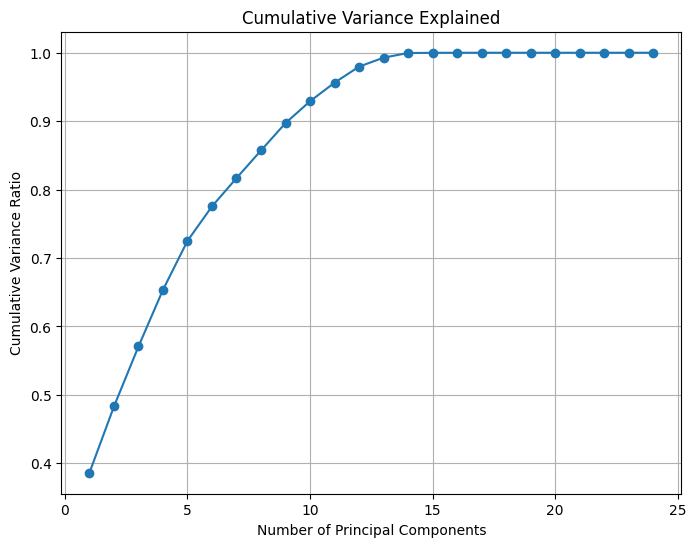

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 因子矩阵包含以下 24 个特征
features = [
    'log_market_cap',          # 对数市值
    'log_volume',              # 对数交易量
    'market_cap',              # 市值
    'price',                   # 当前价格
    'highest_price',           # 最高价格
    'coin_age',                # 币龄
    'momentum_1w',             # 一周动量
    'avg_volume',              # 平均交易量
    'price_volume',            # 价格乘交易量
    'normalized_volume',       # 标准化交易量
    'std_return',              # 收益标准差
    'price_volatility',        # 价格波动率
    'max_return',              # 最大收益
    'return_delay',            # 延迟收益
    'MA_5',                    # 5日移动平均线
    'MA_15',                   # 15日移动平均线
    'EMA_5',                   # 5日指数移动平均线
    'EMA_15',                  # 15日指数移动平均线
    'OBV',                     # 能量潮指标
    'MACD',                    # 平滑异同移动平均线
    'MACD_signal',             # MACD 信号线
    'MACD_hist',               # MACD 柱状图
    'PSAR',                    # 抛物线转向指标
    'reDaily7'                 # 最近 7 天的收益率
]

# 1. 数据预处理：提取特征矩阵
pca_data = merged_data_001[features].dropna()

# 标准化特征矩阵
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# 2. 主成分分析
pca = PCA(n_components=min(len(features), len(pca_data)))  # 确保主成分数量不超过样本数
pca.fit(pca_data_scaled)

# 获取主成分结果
explained_variance_ratio = pca.explained_variance_ratio_  # 每个主成分解释的方差比
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)  # 累计方差解释率

# 输出前几个主成分的累计方差解释率
print("累计方差解释率：")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"主成分 {i+1}: {ratio:.4f}")

# 3. 提取主成分得分
principal_components = pca.transform(pca_data_scaled)
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# 可视化累计方差解释率（可选）
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid()
plt.show()

VI. 机制探讨与额外分析

	1.	规模效应的流动性机制：
	•	测试小市值货币是否存在更高的流动性溢价。
	•	在高波动市场中，检验规模溢价是否更显著。
	2.	动量效应的过度反应机制：
	•	分析投资者关注度对动量效应的影响。
	•	检验大市值加密货币是否更明显地表现动量效应。
	3.	交易成本与可实现性分析：
	•	考虑交易费用、买卖价差、做空成本对策略收益的影响。
	•	在顶级流动性加密货币中重复实验以测试可实现性。

In [22]:
# 流动性溢价分析：计算市值与流动性之间的关系
def liquidity_premium_analysis(data):
    """
    测试小市值货币是否存在更高的流动性溢价。
    """
    data['liquidity_premium'] = data['log_market_cap'] / data['log_volume']  # 流动性指标
    correlation = data[['log_market_cap', 'liquidity_premium']].corr()
    print("市值与流动性溢价的相关性：")
    print(correlation)
    
# 高波动市场中规模溢价分析
def high_volatility_premium(data):
    """
    在高波动市场中检验规模溢价。
    """
    high_vol_group = data[data['price_volatility'] > data['price_volatility'].median()]
    small_cap = high_vol_group[high_vol_group['log_market_cap'] < high_vol_group['log_market_cap'].median()]
    large_cap = high_vol_group[high_vol_group['log_market_cap'] >= high_vol_group['log_market_cap'].median()]
    premium = small_cap['reDaily'].mean() - large_cap['reDaily'].mean()
    print(f"高波动市场中的规模溢价：{premium:.4f}")

# 应用函数
liquidity_premium_analysis(merged_data_001)
high_volatility_premium(merged_data_001)

市值与流动性溢价的相关性：
                   log_market_cap  liquidity_premium
log_market_cap           1.000000           0.245922
liquidity_premium        0.245922           1.000000
高波动市场中的规模溢价：1046649.8975


In [23]:
# 分析投资者关注度对动量效应的影响
def attention_effect_on_momentum(data):
    """
    测试投资者关注度对动量效应的影响。
    """
    data['momentum_effect'] = data['momentum_1w'] / data['log_market_cap']  # 动量与市值的比率
    correlation = data[['momentum_effect', 'log_market_cap']].corr()
    print("投资者关注度与动量效应的相关性：")
    print(correlation)

# 检验大市值加密货币是否更明显表现动量效应
def momentum_in_large_cap(data):
    """
    检验大市值加密货币中动量效应是否显著。
    """
    large_cap = data[data['log_market_cap'] >= data['log_market_cap'].median()]
    low_momentum = large_cap[large_cap['momentum_1w'] <= large_cap['momentum_1w'].median()]
    high_momentum = large_cap[large_cap['momentum_1w'] > large_cap['momentum_1w'].median()]
    momentum_return = high_momentum['reDaily'].mean() - low_momentum['reDaily'].mean()
    print(f"大市值加密货币中的动量效应：{momentum_return:.4f}")

# 应用函数
attention_effect_on_momentum(merged_data_001)
momentum_in_large_cap(merged_data_001)


投资者关注度与动量效应的相关性：
                 momentum_effect  log_market_cap
momentum_effect         1.000000        0.015949
log_market_cap          0.015949        1.000000
大市值加密货币中的动量效应：212426.4490


In [24]:
# 交易成本的影响分析
def transaction_cost_analysis(data, transaction_cost_rate=0.002):
    """
    考虑交易费用对策略收益的影响。
    """
    data['strategy_return_after_cost'] = data['reDaily'] - transaction_cost_rate
    avg_return = data['strategy_return_after_cost'].mean()
    print(f"扣除交易费用后的平均策略收益：{avg_return:.4f}")

# 流动性加密货币中实验的可实现性
def liquidity_impact_analysis(data, liquidity_threshold):
    """
    在顶级流动性加密货币中测试策略的可实现性。
    """
    liquid_crypto = data[data['log_volume'] >= liquidity_threshold]
    avg_return = liquid_crypto['reDaily'].mean()
    print(f"顶级流动性加密货币的平均策略收益：{avg_return:.4f}")

# 应用函数
transaction_cost_analysis(merged_data_001, transaction_cost_rate=0.002)
liquidity_impact_analysis(merged_data_001, liquidity_threshold=merged_data_001['log_volume'].quantile(0.9))

扣除交易费用后的平均策略收益：677126.3312
顶级流动性加密货币的平均策略收益：2814394.4187


VII. 结果可视化

	1.	表格与统计图：
	•	特征排序的分组收益表。
	•	不同因子模型的回归结果表。
	•	主成分解释能力的累积方差图。
	2.	趋势图：
	•	加密货币市场收益与主要因子（规模、动量）的时间序列图。
	•	长短策略收益的变化趋势图。

In [25]:
# 分组收益表
def group_return_table(data, factor, return_col='reDaily'):
    """
    根据特定因子分组，计算分组收益。
    :param data: 数据集。
    :param factor: 因子名称。
    :param return_col: 收益列。
    :return: 分组收益表。
    """
    data['factor_group'] = pd.qcut(data[factor], 5, labels=['G1', 'G2', 'G3', 'G4', 'G5'])
    grouped = data.groupby('factor_group')[return_col].mean().reset_index()
    grouped.columns = ['Group', 'Average Return']
    return grouped

# 生成分组收益表
factor = 'log_market_cap'  # 替换为目标因子
grouped_table = group_return_table(merged_data_001, factor)
print(grouped_table)

  Group  Average Return
0    G1    1.517619e+06
1    G2    8.918947e+05
2    G3    4.189624e+05
3    G4    3.171435e+05
4    G5    2.400125e+05


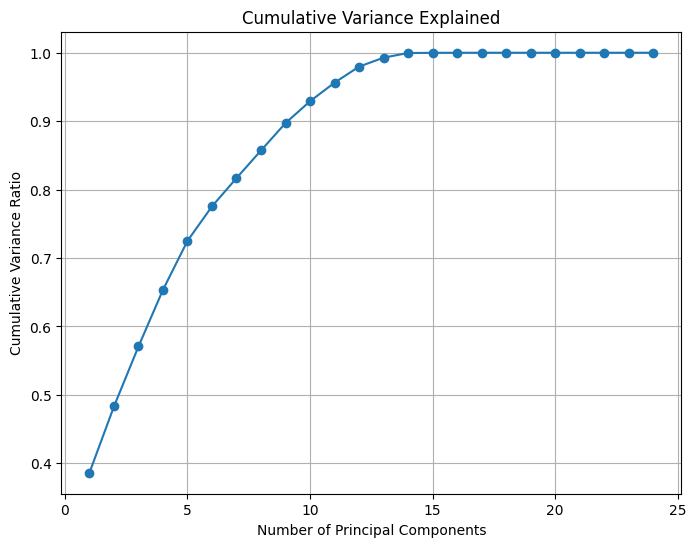

In [27]:
import matplotlib.pyplot as plt

# 假设 cumulative_variance_ratio 是 PCA 的累计方差解释率
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid()
plt.show()

VIII. 稳健性与对比分析

	1.	稳健性测试：
	•	更换因子构建方法（如不同的市值和收益分组标准）。
	•	在其他时间段和数据集上验证结果。
	2.	对比传统资产定价模型：
	•	检验 Fama-French 三因子模型、Carhart 四因子模型是否适用于加密货币市场。
	3.	与传统市场对比：
	•	对比加密货币和股票市场中规模和动量因子的异同。

In [28]:
def alternative_factor_grouping(data, factor, return_col='reDaily'):
    """
    使用不同的分组标准计算因子分组收益。
    :param data: 数据集。
    :param factor: 因子名称。
    :param return_col: 收益列。
    :return: 分组收益表。
    """
    data['factor_group'] = pd.cut(data[factor], bins=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    grouped = data.groupby('factor_group')[return_col].mean().reset_index()
    grouped.columns = ['Group', 'Average Return']
    return grouped

# 更换因子构建方法测试
factor = 'log_market_cap'
alt_grouping_table = alternative_factor_grouping(merged_data_001, factor)
print("更换因子构建方法的分组收益表：")
print(alt_grouping_table)


更换因子构建方法的分组收益表：
  Group  Average Return
0    Q1    7.688746e+06
1    Q2    6.731254e+05
2    Q3    2.859555e+05
3    Q4    1.070934e-03


In [29]:
# 根据时间段进行分组验证
def time_period_analysis(data, start_date, end_date, factor, return_col='reDaily'):
    """
    在特定时间段内验证因子分组收益。
    :param data: 数据集。
    :param start_date: 起始日期。
    :param end_date: 结束日期。
    :param factor: 因子名称。
    :param return_col: 收益列。
    :return: 分组收益表。
    """
    period_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    return alternative_factor_grouping(period_data, factor, return_col)

# 时间段验证
start_date = '2023-01-01'
end_date = '2023-06-30'
time_period_table = time_period_analysis(merged_data_001, start_date, end_date, factor)
print(f"时间段 {start_date} 至 {end_date} 的分组收益表：")
print(time_period_table)

时间段 2023-01-01 至 2023-06-30 的分组收益表：
  Group  Average Return
0    Q1    8.818051e+06
1    Q2    7.231101e+05
2    Q3    6.184112e+05
3    Q4   -4.907631e-03


/tmp/ipykernel_3436406/1576865641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['factor_group'] = pd.cut(data[factor], bins=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


In [6]:
print(merged_data_001['reDaily'].describe())

count    1.265100e+05
mean     6.771263e+05
std      1.901357e+07
min     -5.015380e-01
25%     -2.489083e-02
50%      1.515850e-03
75%      2.810866e-02
max      2.850859e+09
Name: reDaily, dtype: float64


收益率的 max 达到了 2.85 billion (2.85e+09)，这远高于预期范围。同时，std（标准差）也极大（1.9e+07），说明数据中存在极端值或异常值。这是导致分组收益异常的主要原因

In [8]:
from scipy.stats.mstats import winsorize

# Winsorize 收益率，限制在 [-1, 1]
merged_data_001['reDaily'] = winsorize(merged_data_001['reDaily'], limits=[0.01, 0.01])  # 去掉上下1%的极端值

In [9]:
# 删除收益率超出 [-1, 1] 的数据
merged_data_001 = merged_data_001[(merged_data_001['reDaily'] >= -1) & (merged_data_001['reDaily'] <= 1)]

In [10]:
print(merged_data_001['reDaily'].describe())

count    121653.000000
mean          0.001362
std           0.053694
min          -0.130104
25%          -0.026220
50%          -0.000221
75%           0.024135
max           0.961117
Name: reDaily, dtype: float64


In [12]:
import numpy as np

# 检查是否存在 market_cap 列
if 'market_cap' in merged_data_001.columns:
    # 避免对零或负值取对数
    merged_data_001['log_market_cap'] = np.log1p(merged_data_001['market_cap'])
else:
    print("Error: 'market_cap' 列不存在，无法计算 'log_market_cap'")

/tmp/ipykernel_3970051/2509796235.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_001['log_market_cap'] = np.log1p(merged_data_001['market_cap'])


In [13]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,coin_age,momentum_1w,avg_volume,price_volume,normalized_volume,std_return,price_volatility,max_return,return_delay,log_market_cap
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,2.766905,-6.255356e-02,3.898430e+09,1.095008e+07,214.224507,-4.134853e+06,0.000333,-6.344846e+06,4.283744e+06,16.208857
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,1.000000,-2.071397e-02,3.520068e+09,7.900629e+06,220.361393,-3.814467e+06,0.000218,-1.746209e+07,-2.784919e-02,15.882453
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,2.000000,4.189312e-02,3.520068e+09,6.970549e+06,226.449275,-3.814467e+06,0.000219,-1.746209e+07,-2.688409e-02,15.757205
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,3.000000,7.033998e-02,4.550141e+09,1.333137e+07,234.466589,1.687966e+06,0.000361,-5.455420e+06,-3.419384e-02,16.405631
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,4.000000,1.373106e-01,2.316460e+09,8.517039e+06,236.742424,1.687966e+06,0.000240,-4.248563e+06,-9.613130e-03,15.957579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126504,2024-09-20T00:00:00.000Z,0.127400,0.134800,0.125600,0.130500,9.593902e+07,1.726877e+12,1.250562e+07,54714.0,4.519967e+07,...,534.000000,1.399291e+07,9.018883e+07,1.252004e+07,7.662835,1.175144e+01,0.009200,1.159170e-01,2.352941e-02,16.342841
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,535.000000,7.976745e+06,9.028803e+07,5.965042e+06,7.564297,1.175143e+01,0.004400,1.159170e-01,1.302682e-02,15.601427
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,536.000000,7.976745e+06,8.984999e+07,5.963069e+06,7.892660,1.175142e+01,0.009700,1.159170e-01,-4.160363e-02,15.601096
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,537.000000,7.976745e+06,8.900928e+07,5.853819e+06,7.627765,1.175142e+01,0.008100,1.159170e-01,3.472770e-02,15.582605


In [14]:
print(merged_data_001['market_cap'].describe())

# 检查是否有异常值或缺失值
missing_values = merged_data_001['market_cap'].isna().sum()
zero_values = (merged_data_001['market_cap'] <= 0).sum()
print(f"缺失值数量: {missing_values}, 小于等于 0 的值数量: {zero_values}")

count    1.216530e+05
mean     1.818307e+08
std      1.216686e+09
min      3.066515e+05
25%      9.406238e+06
50%      2.293188e+07
75%      7.425725e+07
max      6.923100e+10
Name: market_cap, dtype: float64
缺失值数量: 0, 小于等于 0 的值数量: 0


In [15]:
# 用中位数填充缺失值
median_value = merged_data_001['market_cap'].median()
merged_data_001['market_cap'].fillna(median_value, inplace=True)
# 替换小于等于 0 的值为较小的正值
merged_data_001.loc[merged_data_001['market_cap'] <= 0, 'market_cap'] = median_value

/tmp/ipykernel_3970051/3004302257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_001['market_cap'].fillna(median_value, inplace=True)


In [16]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,coin_age,momentum_1w,avg_volume,price_volume,normalized_volume,std_return,price_volatility,max_return,return_delay,log_market_cap
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,2.766905,-6.255356e-02,3.898430e+09,1.095008e+07,214.224507,-4.134853e+06,0.000333,-6.344846e+06,4.283744e+06,16.208857
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,1.000000,-2.071397e-02,3.520068e+09,7.900629e+06,220.361393,-3.814467e+06,0.000218,-1.746209e+07,-2.784919e-02,15.882453
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,2.000000,4.189312e-02,3.520068e+09,6.970549e+06,226.449275,-3.814467e+06,0.000219,-1.746209e+07,-2.688409e-02,15.757205
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,3.000000,7.033998e-02,4.550141e+09,1.333137e+07,234.466589,1.687966e+06,0.000361,-5.455420e+06,-3.419384e-02,16.405631
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,4.000000,1.373106e-01,2.316460e+09,8.517039e+06,236.742424,1.687966e+06,0.000240,-4.248563e+06,-9.613130e-03,15.957579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126504,2024-09-20T00:00:00.000Z,0.127400,0.134800,0.125600,0.130500,9.593902e+07,1.726877e+12,1.250562e+07,54714.0,4.519967e+07,...,534.000000,1.399291e+07,9.018883e+07,1.252004e+07,7.662835,1.175144e+01,0.009200,1.159170e-01,2.352941e-02,16.342841
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,535.000000,7.976745e+06,9.028803e+07,5.965042e+06,7.564297,1.175143e+01,0.004400,1.159170e-01,1.302682e-02,15.601427
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,536.000000,7.976745e+06,8.984999e+07,5.963069e+06,7.892660,1.175142e+01,0.009700,1.159170e-01,-4.160363e-02,15.601096
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,537.000000,7.976745e+06,8.900928e+07,5.853819e+06,7.627765,1.175142e+01,0.008100,1.159170e-01,3.472770e-02,15.582605


In [17]:
from scipy.stats.mstats import winsorize

# 对 log_market_cap 进行 Winsorization
merged_data_001['log_market_cap'] = winsorize(merged_data_001['log_market_cap'], limits=[0.01, 0.01])

/tmp/ipykernel_3970051/2812825145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_001['log_market_cap'] = winsorize(merged_data_001['log_market_cap'], limits=[0.01, 0.01])


In [18]:
import numpy as np
from scipy.stats.mstats import winsorize

# 检查并生成 log_market_cap 列
if 'market_cap' in merged_data_001.columns:
    merged_data_001['log_market_cap'] = np.log1p(merged_data_001['market_cap'])
else:
    raise KeyError("'market_cap' 列不存在，无法计算 'log_market_cap'")

# 检查 market_cap 列的异常值
missing_values = merged_data_001['market_cap'].isna().sum()
zero_values = (merged_data_001['market_cap'] <= 0).sum()
if missing_values > 0 or zero_values > 0:
    # 处理异常值
    median_value = merged_data_001['market_cap'].median()
    merged_data_001['market_cap'].fillna(median_value, inplace=True)
    merged_data_001.loc[merged_data_001['market_cap'] <= 0, 'market_cap'] = median_value

# Winsorization
merged_data_001['log_market_cap'] = winsorize(merged_data_001['log_market_cap'], limits=[0.01, 0.01])

# 检查生成的 log_market_cap 列
print(merged_data_001['log_market_cap'].describe())

count    121653.000000
mean         17.170890
std           1.489669
min          14.476219
25%          16.056884
50%          16.948039
75%          18.123046
max          21.762108
Name: log_market_cap, dtype: float64


/tmp/ipykernel_3970051/2550193645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_001['log_market_cap'] = np.log1p(merged_data_001['market_cap'])
/tmp/ipykernel_3970051/2550193645.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_001['log_market_cap'] = winsorize(merged_data_001['log_market_cap'], limits=[0.01, 0.01])
/home/llm/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the Masked

In [19]:
merged_data_001

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,coin_age,momentum_1w,avg_volume,price_volume,normalized_volume,std_return,price_volatility,max_return,return_delay,log_market_cap
0,2023-04-05T00:00:00.000Z,0.004807,0.004878,0.004545,0.004668,2.345775e+09,1.680739e+12,1.106453e+07,86650.0,1.105395e+09,...,2.766905,-6.255356e-02,3.898430e+09,1.095008e+07,214.224507,-4.134853e+06,0.000333,-6.344846e+06,4.283744e+06,16.208857
1,2023-04-06T00:00:00.000Z,0.004668,0.004683,0.004465,0.004538,1.740994e+09,1.680826e+12,7.900023e+06,68725.0,8.329836e+08,...,1.000000,-2.071397e-02,3.520068e+09,7.900629e+06,220.361393,-3.814467e+06,0.000218,-1.746209e+07,-2.784919e-02,15.882453
2,2023-04-07T00:00:00.000Z,0.004540,0.004570,0.004351,0.004416,1.578476e+09,1.680912e+12,6.993093e+06,57472.0,7.815634e+08,...,2.000000,4.189312e-02,3.520068e+09,6.970549e+06,226.449275,-3.814467e+06,0.000219,-1.746209e+07,-2.688409e-02,15.757205
3,2023-04-08T00:00:00.000Z,0.004416,0.004589,0.004228,0.004265,3.125761e+09,1.680998e+12,1.371890e+07,89520.0,1.486423e+09,...,3.000000,7.033998e-02,4.550141e+09,1.333137e+07,234.466589,1.687966e+06,0.000361,-5.455420e+06,-3.419384e-02,16.405631
4,2023-04-09T00:00:00.000Z,0.004266,0.004327,0.004087,0.004224,2.016344e+09,1.681085e+12,8.474897e+06,73047.0,9.809776e+08,...,4.000000,1.373106e-01,2.316460e+09,8.517039e+06,236.742424,1.687966e+06,0.000240,-4.248563e+06,-9.613130e-03,15.957579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126504,2024-09-20T00:00:00.000Z,0.127400,0.134800,0.125600,0.130500,9.593902e+07,1.726877e+12,1.250562e+07,54714.0,4.519967e+07,...,534.000000,1.399291e+07,9.018883e+07,1.252004e+07,7.662835,1.175144e+01,0.009200,1.159170e-01,2.352941e-02,16.342841
126505,2024-09-21T00:00:00.000Z,0.130500,0.132700,0.128300,0.132200,4.512135e+07,1.726963e+12,5.886398e+06,32808.0,2.113208e+07,...,535.000000,7.976745e+06,9.028803e+07,5.965042e+06,7.564297,1.175143e+01,0.004400,1.159170e-01,1.302682e-02,15.601427
126506,2024-09-22T00:00:00.000Z,0.132300,0.132300,0.122600,0.126700,4.706448e+07,1.727050e+12,5.986429e+06,38344.0,2.138675e+07,...,536.000000,7.976745e+06,8.984999e+07,5.963069e+06,7.892660,1.175142e+01,0.009700,1.159170e-01,-4.160363e-02,15.601096
126507,2024-09-23T00:00:00.000Z,0.126800,0.132100,0.124000,0.131100,4.465155e+07,1.727136e+12,5.792495e+06,38808.0,2.208139e+07,...,537.000000,7.976745e+06,8.900928e+07,5.853819e+06,7.627765,1.175142e+01,0.008100,1.159170e-01,3.472770e-02,15.582605


In [20]:
import pandas as pd
import numpy as np

# 过滤时间范围内的数据
filtered_data = merged_data_001[
    (merged_data_001['date'] >= '2023-01-01') & (merged_data_001['date'] <= '2023-06-30')
].copy()  # 使用 copy 避免 SettingWithCopyWarning

# 检查是否有需要的列
if 'log_market_cap' not in filtered_data.columns or 'reDaily' not in filtered_data.columns:
    raise KeyError("'log_market_cap' 或 'reDaily' 列缺失，无法分组计算收益")

# 分组计算
filtered_data['factor_group'] = pd.cut(
    filtered_data['log_market_cap'],
    bins=4,
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

# 按分组计算平均收益
grouped = filtered_data.groupby('factor_group')['reDaily'].mean().reset_index()
grouped.columns = ['Group', 'Average Return']

# 打印结果
print("清洗后的分组收益表：")
print(grouped)

清洗后的分组收益表：
  Group  Average Return
0    Q1       -0.002237
1    Q2       -0.001839
2    Q3       -0.003385
3    Q4       -0.001626


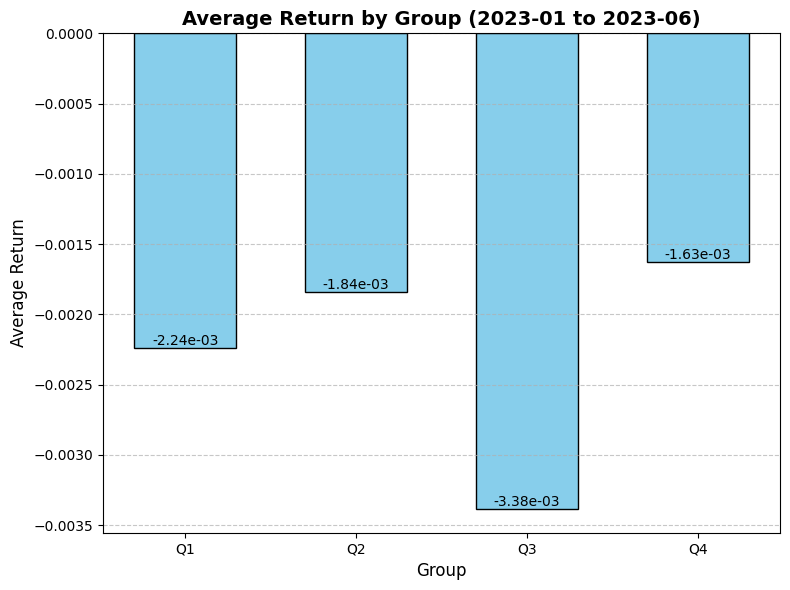

In [21]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(8, 6))

# 绘制条形图
plt.bar(
    grouped['Group'], 
    grouped['Average Return'], 
    color='skyblue', 
    edgecolor='black', 
    width=0.6
)

# 添加标题和标签
plt.title('Average Return by Group (2023-01 to 2023-06)', fontsize=14, fontweight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Average Return', fontsize=12)

# 显示数值标签
for index, value in enumerate(grouped['Average Return']):
    plt.text(
        index, 
        value, 
        f'{value:.2e}',  # 格式化为科学计数法
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# 添加网格线（仅在 y 轴上）
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()  # 自动调整布局
plt.show()

数据集中时间段内的整体收益率确实为负

平均值是否受到异常值或极端负值的影响

分组方式是否正确？是否有可能 Q1 至 Q4 的分组范围并未反映出因子和收益的逻辑关系

In [22]:
# 查看每组的范围
for group, sub_df in filtered_data.groupby('factor_group'):
    print(f"Group: {group}")
    print(sub_df['log_market_cap'].describe())

Group: Q1
count    4139.000000
mean       15.739629
std         0.405608
min        14.476219
25%        15.498551
50%        15.817913
75%        16.063494
max        16.297687
Name: log_market_cap, dtype: float64
Group: Q2
count    7226.000000
mean       17.114025
std         0.499035
min        16.297858
25%        16.700789
50%        17.065799
75%        17.508498
max        18.118608
Name: log_market_cap, dtype: float64
Group: Q3
count    3041.000000
mean       18.875743
std         0.499153
min        18.119221
25%        18.447089
50%        18.821459
75%        19.253872
max        19.940399
Name: log_market_cap, dtype: float64
Group: Q4
count    659.000000
mean      20.813974
std        0.699802
min       19.940663
25%       20.182391
50%       20.567067
75%       21.762108
max       21.762108
Name: log_market_cap, dtype: float64


In [23]:
# 查看总体收益分布
print(filtered_data['reDaily'].describe())

# 检查是否存在极端值
extreme_values = filtered_data[(filtered_data['reDaily'] < -0.1) | (filtered_data['reDaily'] > 0.1)]
print(f"极端值数量: {len(extreme_values)}")
print(extreme_values)

count    15065.000000
mean        -0.002251
std          0.043664
min         -0.130104
25%         -0.021931
50%          0.000749
75%          0.019780
max          0.721747
Name: reDaily, dtype: float64
极端值数量: 611
                       open_time      open      high       low     close  \
13      2023-04-18T00:00:00.000Z  0.004612  0.004787  0.004550  0.004775   
32      2023-05-07T00:00:00.000Z  0.003563  0.003626  0.003455  0.003583   
60      2023-06-04T00:00:00.000Z  0.003646  0.003722  0.003618  0.003663   
65      2023-06-09T00:00:00.000Z  0.003263  0.003277  0.003163  0.003227   
572     2023-05-07T00:00:00.000Z  0.002457  0.002474  0.002405  0.002420   
...                          ...       ...       ...       ...       ...   
125492  2023-06-06T00:00:00.000Z  0.380900  0.391500  0.361700  0.385300   
125495  2023-06-09T00:00:00.000Z  0.340800  0.352700  0.330400  0.339900   
125983  2023-04-18T00:00:00.000Z  0.287600  0.296900  0.282000  0.291500   
126030  2023-06-04T00:0

In [24]:
grouped = filtered_data.groupby('factor_group')['reDaily'].median().reset_index()
grouped.columns = ['Group', 'Median Return']

print("清洗后的分组中位数收益表：")
print(grouped)

清洗后的分组中位数收益表：
  Group  Median Return
0    Q1       0.001823
1    Q2       0.001532
2    Q3      -0.002147
3    Q4      -0.003070


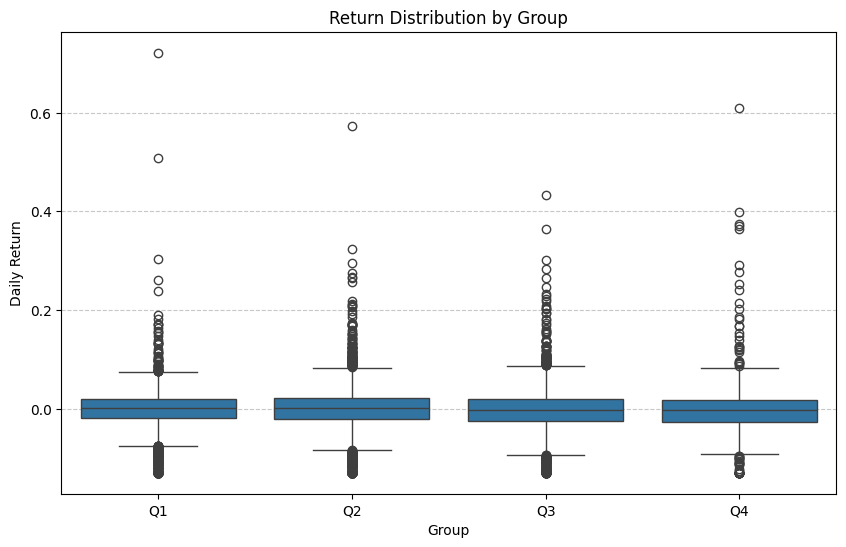

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制每组收益的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='factor_group', y='reDaily', data=filtered_data)
plt.title('Return Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Daily Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

如果分组范围合理且收益分布没有问题，负收益可能反映市场状况，可以在报告中说明这一点

如果负值是由于异常值或分组问题，可以通过调整分组方法或替换统计指标（如用中位数）改善结果

可视化收益分布能帮助更直观地分析问题